In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import time
from mike_code import LaguerreAmplitudes
import matplotlib.cm as cm


(319, 319) (307, 307)


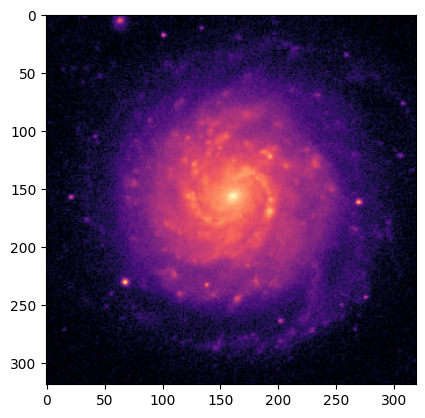

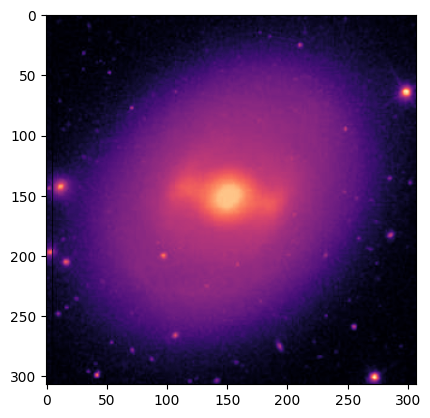

In [59]:
spiralf = np.asarray(Image.open('spiral.jpeg'))
spiralf = np.mean(spiralf,axis=2)/np.max(spiralf)#spiral[:,:,0]/spiral[:,:,0].max()
spiralf = spiralf[1:,1:] #for some reason, skipping this step means that flattened array mask applies to this array??
#spiral = spiral[:-1,45:257]

barf = np.asarray(Image.open('ngc936.jpg'))
#bar = bar[:,:,0]/bar[:,:,0].max()
barf = np.mean(barf, axis=2)
barf = barf/barf.max()
barf = barf[13:, 13:]
print(spiralf.shape, barf.shape)


plt.imshow(spiralf, cmap='magma')
plt.figure()
plt.imshow(barf, cmap='magma')

(2456, 2456) 1.0
(2456, 2456) 1.0
returning coscoefs, sincoefs


"\n##### ------ maybe got to the bottom of this - everything looks better if big resampled \nbar = barf\nxp = np.linspace(-bar.shape[0]/2.,bar.shape[0]/2.,bar.shape[0])\nxpix,ypix = np.meshgrid(xp,xp)\nrr,pp = np.sqrt(xpix**2+ypix**2),np.arctan2(ypix,xpix)\n    \n    \nrval = np.sqrt(xpix**2+ypix**2).reshape(-1,)\nphi  = np.arctan2(ypix,xpix).reshape(-1,)\nbarflat = bar.reshape(-1,).copy() #need a copy\n    \n# pick a radius to not consider outside of\ngvals = np.where(rval>200)\n    \nrval[gvals]         = np.nan\nphi[gvals]          = np.nan\nprint(bar.shape, bar.max())\nbarflat[gvals] = np.nan\n    \n \n# pick a scalelength for the reconstruction\nrscl = int(20)#10\nprint(rscl, barf.shape)\n# make the expansion and compute the weights\nLG = LaguerreAmplitudes(rscl,np.ones(rval.size),phi,barflat,rval,mmax,nmax)\nc_bar, s_bar = LG.laguerre_amplitudes_returns()\n    \n    \nLG.laguerre_reconstruction(rr,pp)\n    #100:300\nplt.figure()\nplt.imshow((LG.reconstruction)[100:180,100:180],vm

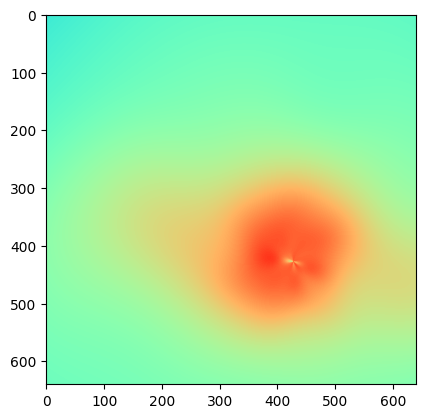

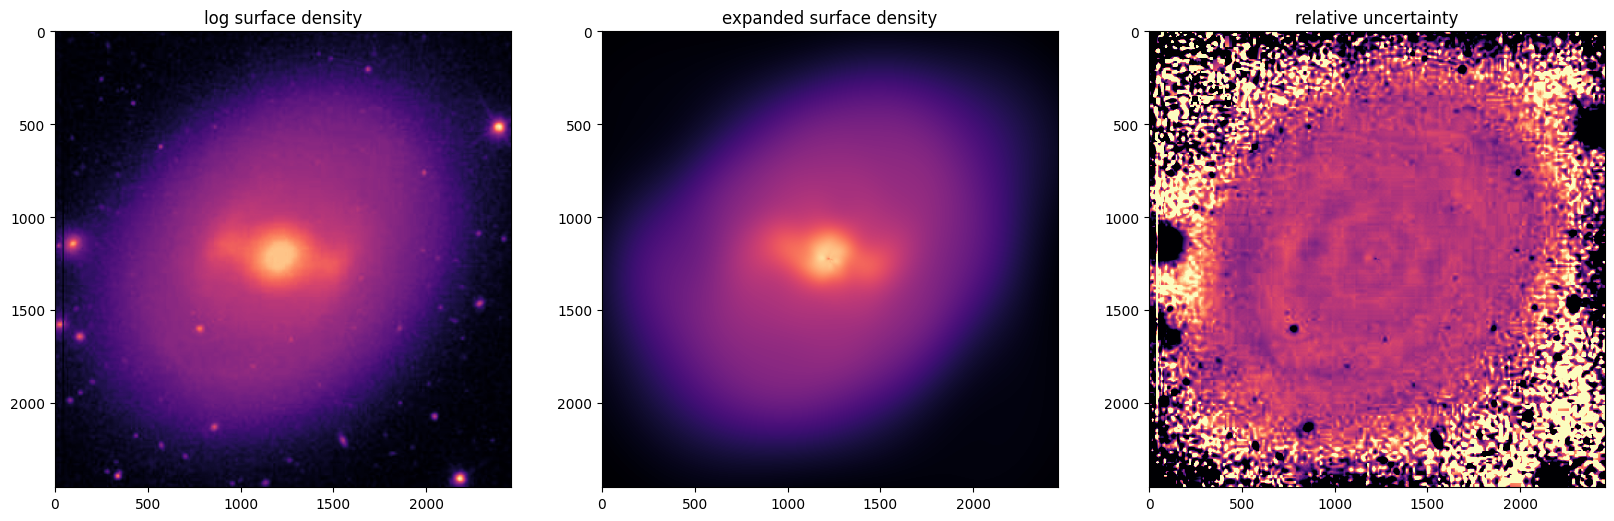

In [61]:
s = 8 #8 is p good for nmax = 11
bar = resize_local_mean(barf, (int(s*barf.shape[0]),int(s*barf.shape[0])))
#bar = barf.copy()
#rescale(barf, 1.2,anti_aliasing=True)#warp_polar(barf, output_shape = (400,400))
xp = np.linspace(-bar.shape[0]/2.,bar.shape[0]/2.,bar.shape[0])
xpix,ypix = np.meshgrid(xp,xp)
rr,pp = np.sqrt(xpix**2+ypix**2),np.arctan2(ypix,xpix)
    
    
rval = np.sqrt(xpix**2+ypix**2).reshape(-1,)
phi  = np.arctan2(ypix,xpix).reshape(-1,)
barflat = bar.reshape(-1,).copy() #need a copy

# pick a radius to not consider outside of
gvals = np.where(rval>200*s)
    
rval[gvals]         = np.nan
phi[gvals]          = np.nan
print(bar.shape, bar.max())
barflat[gvals] = np.nan
    
print(bar.shape, bar.max())
# pick orders for the expansion
mmax = 8  #8
nmax = 12 #24
    
# pick a scalelength for the reconstruction
rscl = 20.*s #10
    
# make the expansion and compute the weights
####LG = LaguerreAmplitudes(rscl,np.ones(rval.size),phi,barflat,rval,mmax,nmax)
# rscl, mmax, nmax, R, phi, mass=1., velocity=1.
LG = LaguerreAmplitudes(rscl,mmax,nmax,rval,phi,barflat)
c_bar, s_bar = LG.laguerre_amplitudes_returns()
    
    
LG.laguerre_reconstruction(rr,pp)
    #100:300
plt.figure()
plt.imshow((LG.reconstruction)[100*s:180*s,100*s:180*s],vmin=np.nanmin(bar), vmax=np.nanmax(bar),cmap='rainbow')
    
    # make a figure for the comparison
# make a figure for the comparison
fig = plt.figure(figsize=(20,10),facecolor='white')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

cval = np.linspace(-5.,1.,32)
ax1.imshow((bar), cmap=plt.cm.magma)
ax2.imshow((LG.reconstruction),vmin=np.nanmin(bar), vmax=np.nanmax(bar),cmap=cm.magma)

# plot the relative uncertainty (maxed out at 25 percent)
ax3.imshow((LG.reconstruction-bar)/bar,vmin=-.25,vmax=.25,cmap=cm.magma)

ax1.set_title('log surface density')
ax2.set_title('expanded surface density')
ax3.set_title('relative uncertainty')

'''
##### ------ maybe got to the bottom of this - everything looks better if big resampled 
bar = barf
xp = np.linspace(-bar.shape[0]/2.,bar.shape[0]/2.,bar.shape[0])
xpix,ypix = np.meshgrid(xp,xp)
rr,pp = np.sqrt(xpix**2+ypix**2),np.arctan2(ypix,xpix)
    
    
rval = np.sqrt(xpix**2+ypix**2).reshape(-1,)
phi  = np.arctan2(ypix,xpix).reshape(-1,)
barflat = bar.reshape(-1,).copy() #need a copy
    
# pick a radius to not consider outside of
gvals = np.where(rval>200)
    
rval[gvals]         = np.nan
phi[gvals]          = np.nan
print(bar.shape, bar.max())
barflat[gvals] = np.nan
    
 
# pick a scalelength for the reconstruction
rscl = int(20)#10
print(rscl, barf.shape)
# make the expansion and compute the weights
LG = LaguerreAmplitudes(rscl,np.ones(rval.size),phi,barflat,rval,mmax,nmax)
c_bar, s_bar = LG.laguerre_amplitudes_returns()
    
    
LG.laguerre_reconstruction(rr,pp)
    #100:300
plt.figure()
plt.imshow((LG.reconstruction)[100:180,100:180],vmin=np.nanmin(bar), vmax=np.nanmax(bar),cmap='rainbow')
    
    # make a figure for the comparison
# make a figure for the comparison
fig = plt.figure(figsize=(20,10),facecolor='white')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

cval = np.linspace(-5.,1.,32)
ax1.imshow((bar), cmap=plt.cm.magma)
ax2.imshow((LG.reconstruction),vmin=np.nanmin(bar), vmax=np.nanmax(bar),cmap=cm.magma)

# plot the relative uncertainty (maxed out at 25 percent)
ax3.imshow((LG.reconstruction-bar)/bar,vmin=-.25,vmax=.25,cmap=cm.magma)

ax1.set_title('log surface density')
ax2.set_title('expanded surface density')
ax3.set_title('relative uncertainty')
'''

In [62]:
np.save('bar_coscoeffs.npy', c_bar)
np.save('bar_sincoeffs.npy', s_bar)

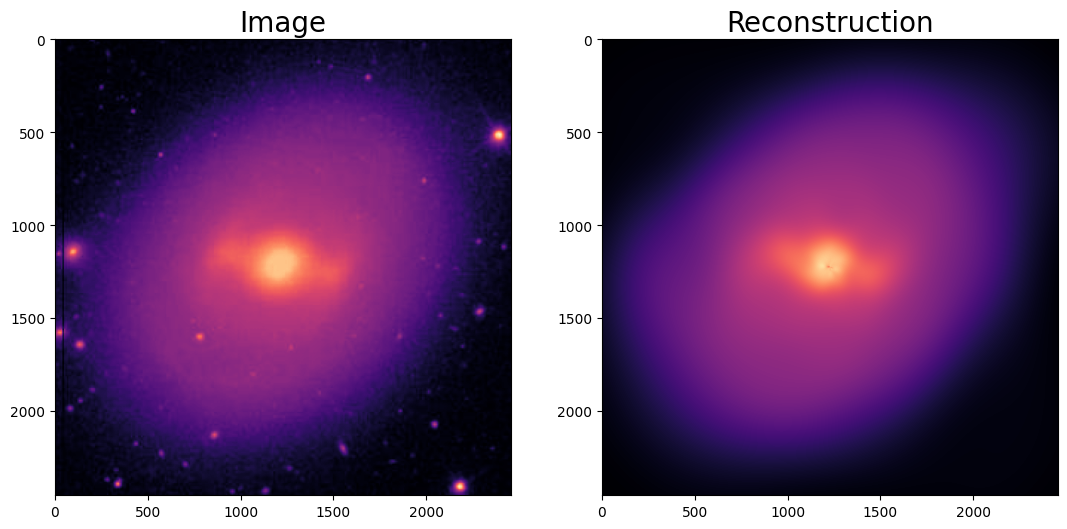

In [63]:
fig = plt.figure(figsize=(20,10),facecolor='white')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

cval = np.linspace(-5.,1.,32)
ax1.imshow((bar), cmap=plt.cm.magma)
ax2.imshow((LG.reconstruction),vmin=np.nanmin(bar), vmax=np.nanmax(bar),cmap=cm.magma)

# plot the relative uncertainty (maxed out at 25 percent)
ax3.imshow((LG.reconstruction-bar)/bar,vmin=-.25,vmax=.25,cmap=cm.magma)

ax1.set_title('Image',fontsize=20)
ax2.set_title('Reconstruction',fontsize=20)
plt.savefig('example.jpeg', bbox_inches = 'tight',
    pad_inches = 0) 


# Spiral -

(1595, 1595) 0.8644536652835408
(1595, 1595) 0.8644536652835408
returning coscoefs, sincoefs


/var/folders/l4/60k630dd5bj2p5fwtj1gg3zc0000gn/T/ipykernel_43892/3186660538.py:52: RuntimeWarning: divide by zero encountered in divide
  ax3.imshow((LG.reconstruction-spiral)/spiral,vmin=-.25,vmax=.25,cmap=cm.magma)


Text(0.5, 1.0, 'relative uncertainty')

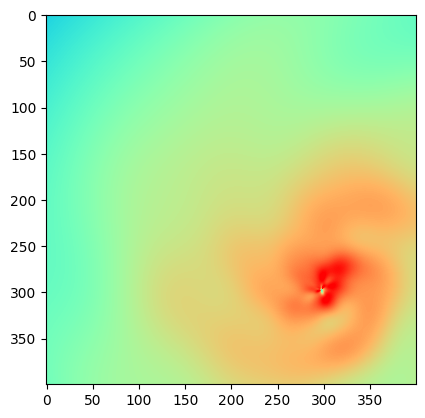

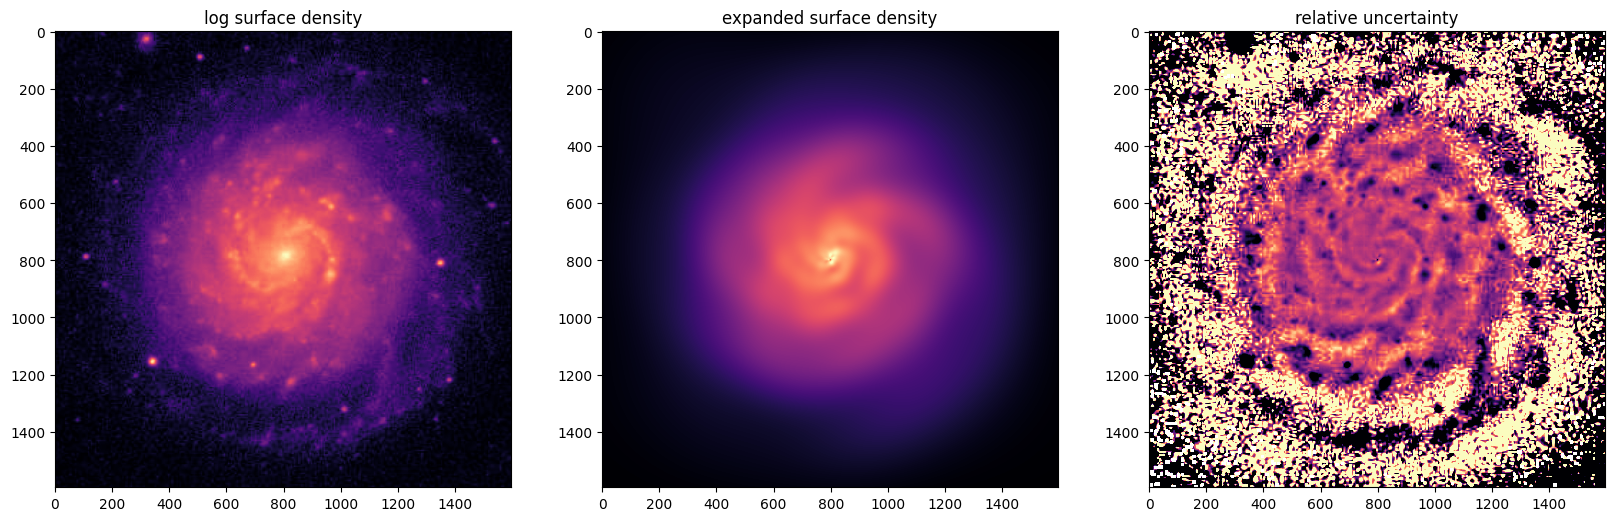

In [68]:
s = 5 ########### was 5
spiral = resize_local_mean(spiralf, (int(s*spiralf.shape[0]),int(s*spiralf.shape[0])))
#rescale(spiralf, 1.2,anti_aliasing=True)#warp_polar(spiralf, output_shape = (400,400))
xp = np.linspace(-spiral.shape[0]/2.,spiral.shape[0]/2.,spiral.shape[0])
xpix,ypix = np.meshgrid(xp,xp)
rr,pp = np.sqrt(xpix**2+ypix**2),np.arctan2(ypix,xpix)
    
    
rval = np.sqrt(xpix**2+ypix**2).reshape(-1,)
phi  = np.arctan2(ypix,xpix).reshape(-1,)
spiralflat = spiral.reshape(-1,).copy() #need a copy

# pick a radius to not consider outside of
gvals = np.where(rval>210*s)
    
rval[gvals]         = np.nan
phi[gvals]          = np.nan
print(spiral.shape, spiral.max())
spiralflat[gvals] = np.nan
    
print(spiral.shape, spiral.max())
# pick orders for the expansion
mmax = 8 #8
nmax = 12 ###21 #24 #
    
# pick a scalelength for the reconstruction
rscl = 10.*s #10 was 20
    
# make the expansion and compute the weights
###LG = LaguerreAmplitudes(rscl,np.ones(rval.size),phi,spiralflat,rval,mmax,nmax)
LG = LaguerreAmplitudes(rscl,mmax,nmax,rval,phi,spiralflat)
c_spiral, s_spiral = LG.laguerre_amplitudes_returns()
    
    
LG.laguerre_reconstruction(rr,pp)
    #100:300
plt.figure()
plt.imshow((LG.reconstruction)[100*s:180*s,100*s:180*s],vmin=np.nanmin(spiral), vmax=np.nanmax(spiral),cmap='rainbow')
    
    # make a figure for the comparison
# make a figure for the comparison
fig = plt.figure(figsize=(20,10),facecolor='white')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

cval = np.linspace(-5.,1.,32)
ax1.imshow((spiral), cmap=plt.cm.magma)
ax2.imshow((LG.reconstruction),vmin=np.nanmin(spiral), vmax=np.nanmax(spiral),cmap=cm.magma)

# plot the relative uncertainty (maxed out at 25 percent)
ax3.imshow((LG.reconstruction-spiral)/spiral,vmin=-.25,vmax=.25,cmap=cm.magma)

ax1.set_title('log surface density')
ax2.set_title('expanded surface density')
ax3.set_title('relative uncertainty')

In [69]:
#reconstruction for spiral is uch better with higher n

In [70]:
np.save('spiral_coscoeffs.npy', c_spiral)
np.save('spiral_sincoeffs.npy', s_spiral)